# Project 2

## Introduction:

Tuberculosis is one of the leading causes of death globally. The disease consistently claims close to as many lives and heart disease and lung cancer$^{2}$. Most leading causes of death are only treatable and/or preventable in most situations. However, tuberculosis is not only preventable but curable. Ideally, this should mean that tuberculosis would be eradicated in the same vein as a disease like smallpox. However this is not reflected in reality. Tuberculosis is rarely prioritized in the same way as cancer or heart disease because its curablility means it rarely impacts privledged countries. For many people in positions of power, TB is treated as a "solved problem" since it is not a concern for those who can access treatment. Although this disparity exists to a certain extent across all diseases, I believe TB illustrates this difference to the greatest extent. My objective with this project is to emphasize this inequity of treatment by using data collected from the World Health Organzation. I want to clarify that I will not be attempting to establish causation between these two variables because both are determined by factors well outside the scope of the dataset. I'm just focusing on their correlation as a means of establishing inequity.

## Exploration:

In [151]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from scipy.stats import linregress

In [153]:
budget = pd.read_csv("data/TB_budget_2024-11-19.csv")
services = pd.read_csv("data/TB_policies_services_2024-11-19.csv")
burden = pd.read_csv("data/TB_burden_countries_2024-11-19.csv")
dictionary = pd.read_csv("data/TB_data_dictionary_2024-11-19.csv")
dictionary

,variable_name,dataset,code_list,definition
0,budget_cpp_dstb,Budget,NaN,Average cost of drugs budgeted per patient for...
1,budget_cpp_mdr,Budget,NaN,Average cost of drugs budgeted per patient for...
2,budget_cpp_tpt,Budget,NaN,Average cost of drugs budgeted per patient for...
3,budget_cpp_xdr,Budget,NaN,Average cost of drugs budgeted per patient for...
4,budget_fld,Budget,NaN,Budget required for drugs to treat drug-suscep...
...,...,...,...,...
683,newrel_ep_spec,Zoonotic TB,NaN,(if ep_spec_available=1) Among bacteriological...
684,newrel_pulm_mbovis,Zoonotic TB,NaN,(if pulm_spec_available=1) Among pulmonary cas...
685,newrel_pulm_spec,Zoonotic TB,NaN,(if pulm_spec_available=1) Among bacteriologic...
686,pulm_spec_available,Zoonotic TB,0=No; 1=Yes; 2=Not applicable,Are data available on the number of bacteriolo...


In [155]:
display(budget,services,burden)

,country,iso2,iso3,iso_numeric,g_whoregion,year,tx_dstb,budget_cpp_dstb,tx_mdr,budget_cpp_mdr,...,cf_orsrvy,budget_oth,cf_oth,budget_tot,cf_tot,cf_tot_domestic,cf_tot_gf,cf_tot_usaid,cf_tot_grnt,cf_tot_sources
0,Afghanistan,AF,AFG,4,EMR,2018,52000.0,40.0,450.0,1400.0,...,344940.0,NaN,2912498.0,10881354.0,10698483.0,533779.0,3178499.0,4462530.0,2523675.0,10698483.0
1,Afghanistan,AF,AFG,4,EMR,2019,53000.0,50.0,585.0,1500.0,...,59000.0,5344361.0,5171641.0,16957452.0,13419792.0,511854.0,6533095.0,2766449.0,3608394.0,13419792.0
2,Afghanistan,AF,AFG,4,EMR,2020,57000.0,40.0,580.0,1000.0,...,400000.0,4000000.0,3600775.0,19137128.0,17978424.0,1171864.0,6935551.0,3000000.0,6871009.0,17978424.0
3,Afghanistan,AF,AFG,4,EMR,2021,53825.0,50.0,725.0,1000.0,...,127420.0,3606831.0,3606831.0,10633599.0,10633599.0,NaN,7638546.0,NaN,2995053.0,10633599.0
4,Afghanistan,AF,AFG,4,EMR,2022,56795.0,50.0,600.0,1000.0,...,67310.0,3529753.0,3529753.0,14141821.0,10599950.0,269339.0,6876137.0,1555946.0,1898528.0,10599950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,Zimbabwe,ZW,ZWE,716,AFR,2020,22304.0,41.0,355.0,1016.0,...,0.0,0.0,0.0,31504677.0,10756252.0,247705.0,8300758.0,1870556.0,337233.0,10756252.0
1501,Zimbabwe,ZW,ZWE,716,AFR,2021,23782.0,50.0,472.0,1106.0,...,329576.0,2096683.0,2096683.0,32126351.0,16096601.0,2096683.0,9803368.0,3284585.0,911965.0,16096601.0
1502,Zimbabwe,ZW,ZWE,716,AFR,2022,17076.0,26.0,271.0,521.0,...,0.0,0.0,0.0,22656137.0,14847642.0,1000000.0,9487457.0,3058830.0,1301355.0,14847642.0
1503,Zimbabwe,ZW,ZWE,716,AFR,2023,19640.0,69.0,206.0,1325.0,...,300000.0,19820.0,19820.0,17359487.0,16153683.0,1000000.0,5774773.0,9378910.0,NaN,16153683.0


,country,iso2,iso3,iso_numeric,g_whoregion,year,caseb_err_nat,hcw_tb_infected,hcw_tot,ident_pris,...,district_cxr,district_wrd,phcf,phcf_wrd,presumptive,wrd_test_capacity,m_wrd_error_rate_lte_5pct,presumptive_wrd,district_monitor_pos_rate,m_wrd_tat_lt_48h
0,Afghanistan,AF,AFG,4,EMR,2023,0.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,AL,ALB,8,EUR,2023,42.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZ,DZA,12,AFR,2023,42.0,167.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,AS,ASM,16,WPR,2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AD,AND,20,EUR,2023,42.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Viet Nam,VN,VNM,704,WPR,2023,44.0,NaN,NaN,1.0,...,427.0,185.0,NaN,NaN,1252571.0,594300.0,185.0,452279.0,705.0,NaN
211,Wallis and Futuna,WF,WLF,876,WPR,2023,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,Yemen,YE,YEM,887,EMR,2023,0.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,Zambia,ZM,ZMB,894,AFR,2023,43.0,329.0,NaN,1.0,...,80.0,116.0,2922.0,2922.0,504351.0,869760.0,332.0,446820.0,116.0,302.0


,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,cfr,cfr_lo,cfr_hi,cfr_pct,cfr_pct_lo,cfr_pct_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,20130323,190.0,122.0,271.0,...,0.37,0.17,0.61,37.0,17.0,61.0,35.0,19.0,13.0,29.0
1,Afghanistan,AF,AFG,4,EMR,2001,20284311,189.0,122.0,271.0,...,0.35,0.16,0.56,35.0,16.0,56.0,50.0,26.0,18.0,41.0
2,Afghanistan,AF,AFG,4,EMR,2002,21378110,189.0,122.0,270.0,...,0.31,0.15,0.51,31.0,15.0,51.0,65.0,34.0,24.0,53.0
3,Afghanistan,AF,AFG,4,EMR,2003,22733047,189.0,122.0,270.0,...,0.32,0.15,0.52,32.0,15.0,52.0,61.0,32.0,23.0,50.0
4,Afghanistan,AF,AFG,4,EMR,2004,23560660,189.0,122.0,270.0,...,0.28,0.13,0.46,28.0,13.0,46.0,78.0,41.0,29.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,Zimbabwe,ZW,ZWE,716,AFR,2019,15271376,199.0,147.0,258.0,...,0.22,0.14,0.31,22.0,14.0,31.0,138.0,69.0,53.0,93.0
5113,Zimbabwe,ZW,ZWE,716,AFR,2020,15526885,188.0,132.0,248.0,...,0.24,0.15,0.34,24.0,15.0,34.0,101.0,54.0,41.0,77.0
5114,Zimbabwe,ZW,ZWE,716,AFR,2021,15797209,199.0,134.0,262.0,...,0.25,0.16,0.37,25.0,16.0,37.0,103.0,52.0,39.0,77.0
5115,Zimbabwe,ZW,ZWE,716,AFR,2022,16069054,209.0,139.0,280.0,...,0.26,0.15,0.38,26.0,15.0,38.0,113.0,54.0,41.0,82.0


In [156]:
#Cleaning:

#Reduce redudant columns
#iso2, iso3, and iso number all communicate the same info so we only need one
budget = budget.drop(columns = ['iso2', 'iso_numeric'])
services = services.drop(columns = ['iso2', 'iso_numeric'])
burden = burden.drop(columns = ['iso2', 'iso_numeric'])

#variable clarity
#changing some variable names to make them easier to understand
budget.rename(columns={"g_whoregion": "region"}, inplace=True)
services.rename(columns={"g_whoregion": "region"}, inplace=True)
burden.rename(columns={"g_whoregion": "region"}, inplace=True)
burden.rename(columns={"e_pop_num": "population"}, inplace=True)
burden.rename(columns={"e_inc_100k": "Est. Infected per 100k"}, inplace=True)
burden.rename(columns={"e_inc_num": "Est. Total Infected"}, inplace=True)
budget.rename(columns={"budget_tot": "budget required for treatment ($)"}, inplace=True)
budget.rename(columns={"tx_tpt": "Number of patients expected to start treatment"}, inplace=True)
budget.rename(columns={"cf_tot_sources":"expected total budget"}, inplace = True)
burden.rename(columns={"e_mort_exc_tbhiv_num":"death"}, inplace = True)

In [159]:
display(budget, services, burden)

,country,iso3,region,year,tx_dstb,budget_cpp_dstb,tx_mdr,budget_cpp_mdr,tx_xdr,budget_cpp_xdr,...,cf_orsrvy,budget_oth,cf_oth,budget required for treatment ($),cf_tot,cf_tot_domestic,cf_tot_gf,cf_tot_usaid,cf_tot_grnt,expected total budget
0,Afghanistan,AFG,EMR,2018,52000.0,40.0,450.0,1400.0,12.0,3100.0,...,344940.0,NaN,2912498.0,10881354.0,10698483.0,533779.0,3178499.0,4462530.0,2523675.0,10698483.0
1,Afghanistan,AFG,EMR,2019,53000.0,50.0,585.0,1500.0,15.0,2000.0,...,59000.0,5344361.0,5171641.0,16957452.0,13419792.0,511854.0,6533095.0,2766449.0,3608394.0,13419792.0
2,Afghanistan,AFG,EMR,2020,57000.0,40.0,580.0,1000.0,20.0,2700.0,...,400000.0,4000000.0,3600775.0,19137128.0,17978424.0,1171864.0,6935551.0,3000000.0,6871009.0,17978424.0
3,Afghanistan,AFG,EMR,2021,53825.0,50.0,725.0,1000.0,25.0,2500.0,...,127420.0,3606831.0,3606831.0,10633599.0,10633599.0,NaN,7638546.0,NaN,2995053.0,10633599.0
4,Afghanistan,AFG,EMR,2022,56795.0,50.0,600.0,1000.0,60.0,1200.0,...,67310.0,3529753.0,3529753.0,14141821.0,10599950.0,269339.0,6876137.0,1555946.0,1898528.0,10599950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,Zimbabwe,ZWE,AFR,2020,22304.0,41.0,355.0,1016.0,21.0,9101.0,...,0.0,0.0,0.0,31504677.0,10756252.0,247705.0,8300758.0,1870556.0,337233.0,10756252.0
1501,Zimbabwe,ZWE,AFR,2021,23782.0,50.0,472.0,1106.0,5.0,1106.0,...,329576.0,2096683.0,2096683.0,32126351.0,16096601.0,2096683.0,9803368.0,3284585.0,911965.0,16096601.0
1502,Zimbabwe,ZWE,AFR,2022,17076.0,26.0,271.0,521.0,4.0,1036.0,...,0.0,0.0,0.0,22656137.0,14847642.0,1000000.0,9487457.0,3058830.0,1301355.0,14847642.0
1503,Zimbabwe,ZWE,AFR,2023,19640.0,69.0,206.0,1325.0,3.0,1325.0,...,300000.0,19820.0,19820.0,17359487.0,16153683.0,1000000.0,5774773.0,9378910.0,NaN,16153683.0


,country,iso3,region,year,caseb_err_nat,hcw_tb_infected,hcw_tot,ident_pris,newrel_prisoners,plhiv_all_screen_data_available,...,district_cxr,district_wrd,phcf,phcf_wrd,presumptive,wrd_test_capacity,m_wrd_error_rate_lte_5pct,presumptive_wrd,district_monitor_pos_rate,m_wrd_tat_lt_48h
0,Afghanistan,AFG,EMR,2023,0.0,NaN,NaN,1.0,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,EUR,2023,42.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,AFR,2023,42.0,167.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,WPR,2023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,EUR,2023,42.0,NaN,NaN,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Viet Nam,VNM,WPR,2023,44.0,NaN,NaN,1.0,1371.0,1.0,...,427.0,185.0,NaN,NaN,1252571.0,594300.0,185.0,452279.0,705.0,NaN
211,Wallis and Futuna,WLF,WPR,2023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,Yemen,YEM,EMR,2023,0.0,NaN,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,Zambia,ZMB,AFR,2023,43.0,329.0,NaN,1.0,504.0,1.0,...,80.0,116.0,2922.0,2922.0,504351.0,869760.0,332.0,446820.0,116.0,302.0


,country,iso3,region,year,population,Est. Infected per 100k,e_inc_100k_lo,e_inc_100k_hi,Est. Total Infected,e_inc_num_lo,...,cfr,cfr_lo,cfr_hi,cfr_pct,cfr_pct_lo,cfr_pct_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AFG,EMR,2000,20130323,190.0,122.0,271.0,38000,25000,...,0.37,0.17,0.61,37.0,17.0,61.0,35.0,19.0,13.0,29.0
1,Afghanistan,AFG,EMR,2001,20284311,189.0,122.0,271.0,38000,25000,...,0.35,0.16,0.56,35.0,16.0,56.0,50.0,26.0,18.0,41.0
2,Afghanistan,AFG,EMR,2002,21378110,189.0,122.0,270.0,40000,26000,...,0.31,0.15,0.51,31.0,15.0,51.0,65.0,34.0,24.0,53.0
3,Afghanistan,AFG,EMR,2003,22733047,189.0,122.0,270.0,43000,28000,...,0.32,0.15,0.52,32.0,15.0,52.0,61.0,32.0,23.0,50.0
4,Afghanistan,AFG,EMR,2004,23560660,189.0,122.0,270.0,44000,29000,...,0.28,0.13,0.46,28.0,13.0,46.0,78.0,41.0,29.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,Zimbabwe,ZWE,AFR,2019,15271376,199.0,147.0,258.0,30000,23000,...,0.22,0.14,0.31,22.0,14.0,31.0,138.0,69.0,53.0,93.0
5113,Zimbabwe,ZWE,AFR,2020,15526885,188.0,132.0,248.0,29000,21000,...,0.24,0.15,0.34,24.0,15.0,34.0,101.0,54.0,41.0,77.0
5114,Zimbabwe,ZWE,AFR,2021,15797209,199.0,134.0,262.0,31000,21000,...,0.25,0.16,0.37,25.0,16.0,37.0,103.0,52.0,39.0,77.0
5115,Zimbabwe,ZWE,AFR,2022,16069054,209.0,139.0,280.0,34000,22000,...,0.26,0.15,0.38,26.0,15.0,38.0,113.0,54.0,41.0,82.0


In [162]:
#setup new datasets that only contain the main variables of interest
#this is subject to change later down the line

new_budget = budget[['country', 'iso3', 'region', 'year', 'budget required for treatment ($)','Number of patients expected to start treatment', 'expected total budget']]
new_services = services[['country', 'iso3', 'region', 'year',]]
new_burden = burden[['country', 'iso3', 'region', 'year', 'population', 'Est. Infected per 100k', 'Est. Total Infected', 'death']]
display(new_budget, new_services,new_burden)
display(new_budget.describe(), new_services.describe(), new_burden.describe())


,country,iso3,region,year,budget required for treatment ($),Number of patients expected to start treatment,expected total budget
0,Afghanistan,AFG,EMR,2018,10881354.0,NaN,10698483.0
1,Afghanistan,AFG,EMR,2019,16957452.0,NaN,13419792.0
2,Afghanistan,AFG,EMR,2020,19137128.0,30000.0,17978424.0
3,Afghanistan,AFG,EMR,2021,10633599.0,25000.0,10633599.0
4,Afghanistan,AFG,EMR,2022,14141821.0,28403.0,10599950.0
...,...,...,...,...,...,...,...
1500,Zimbabwe,ZWE,AFR,2020,31504677.0,403936.0,10756252.0
1501,Zimbabwe,ZWE,AFR,2021,32126351.0,282173.0,16096601.0
1502,Zimbabwe,ZWE,AFR,2022,22656137.0,281741.0,14847642.0
1503,Zimbabwe,ZWE,AFR,2023,17359487.0,291326.0,16153683.0


,country,iso3,region,year
0,Afghanistan,AFG,EMR,2023
1,Albania,ALB,EUR,2023
2,Algeria,DZA,AFR,2023
3,American Samoa,ASM,WPR,2023
4,Andorra,AND,EUR,2023
...,...,...,...,...
210,Viet Nam,VNM,WPR,2023
211,Wallis and Futuna,WLF,WPR,2023
212,Yemen,YEM,EMR,2023
213,Zambia,ZMB,AFR,2023


,country,iso3,region,year,population,Est. Infected per 100k,Est. Total Infected,death
0,Afghanistan,AFG,EMR,2000,20130323,190.0,38000,14000.0
1,Afghanistan,AFG,EMR,2001,20284311,189.0,38000,13000.0
2,Afghanistan,AFG,EMR,2002,21378110,189.0,40000,12000.0
3,Afghanistan,AFG,EMR,2003,22733047,189.0,43000,13000.0
4,Afghanistan,AFG,EMR,2004,23560660,189.0,44000,12000.0
...,...,...,...,...,...,...,...,...
5112,Zimbabwe,ZWE,AFR,2019,15271376,199.0,30000,1700.0
5113,Zimbabwe,ZWE,AFR,2020,15526885,188.0,29000,2000.0
5114,Zimbabwe,ZWE,AFR,2021,15797209,199.0,31000,2300.0
5115,Zimbabwe,ZWE,AFR,2022,16069054,209.0,34000,2500.0


,year,budget required for treatment ($),Number of patients expected to start treatment,expected total budget
count,1505.000000,9.590000e+02,5.240000e+02,7.520000e+02
mean,2021.000000,4.881124e+07,7.010279e+04,4.553199e+07
std,2.000665,1.622822e+08,2.639463e+05,1.694260e+08
min,2018.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2019.000000,1.201550e+06,1.348500e+03,1.842642e+06
50%,2021.000000,6.180000e+06,5.000000e+03,6.882944e+06
75%,2023.000000,2.711594e+07,2.288275e+04,2.056800e+07
max,2024.000000,1.640128e+09,3.500000e+06,1.640128e+09


,year
count,215.0
mean,2023.0
std,0.0
min,2023.0
25%,2023.0
50%,2023.0
75%,2023.0
max,2023.0


,year,population,Est. Infected per 100k,Est. Total Infected,death
count,5117.000000,5.117000e+03,5117.000000,5.117000e+03,5093.000000
mean,2011.564198,3.340651e+07,122.488249,5.202721e+04,6631.695857
std,6.910918,1.317597e+08,183.694458,2.505798e+05,37001.658652
min,2000.000000,1.552000e+03,0.000000,0.000000e+00,0.000000
25%,2006.000000,7.625820e+05,12.000000,2.100000e+02,15.000000
50%,2012.000000,5.939341e+06,46.000000,2.900000e+03,210.000000
75%,2018.000000,2.154746e+07,160.000000,1.700000e+04,1700.000000
max,2023.000000,1.438070e+09,1590.000000,3.590000e+06,786000.000000


In [163]:
#focus on year 2023 for now
new_budget_2023 = new_budget[new_budget['year'] == 2023]
new_services_2023 = new_services[new_services['year'] == 2023]
new_burden_2023 = new_burden[new_burden['year'] == 2023]

display(new_budget_2023,
new_services_2023,
new_burden_2023)

,country,iso3,region,year,budget required for treatment ($),Number of patients expected to start treatment,expected total budget
5,Afghanistan,AFG,EMR,2023,23551821.0,34830.0,17048217.0
12,Albania,ALB,EUR,2023,1203000.0,NaN,NaN
19,Algeria,DZA,AFR,2023,NaN,4000.0,NaN
26,American Samoa,ASM,WPR,2023,NaN,NaN,NaN
33,Andorra,AND,EUR,2023,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1475,Viet Nam,VNM,WPR,2023,149731394.0,150000.0,41952557.0
1482,Wallis and Futuna,WLF,WPR,2023,NaN,NaN,NaN
1489,Yemen,YEM,EMR,2023,3686999.0,4000.0,1842361.0
1496,Zambia,ZMB,AFR,2023,34979074.0,325092.0,32314757.0


,country,iso3,region,year
0,Afghanistan,AFG,EMR,2023
1,Albania,ALB,EUR,2023
2,Algeria,DZA,AFR,2023
3,American Samoa,ASM,WPR,2023
4,Andorra,AND,EUR,2023
...,...,...,...,...
210,Viet Nam,VNM,WPR,2023
211,Wallis and Futuna,WLF,WPR,2023
212,Yemen,YEM,EMR,2023
213,Zambia,ZMB,AFR,2023


,country,iso3,region,year,population,Est. Infected per 100k,Est. Total Infected,death
23,Afghanistan,AFG,EMR,2023,41454760,180.0,75000,10000.0
47,Albania,ALB,EUR,2023,2811661,15.0,430,7.0
71,Algeria,DZA,AFR,2023,46164214,47.0,22000,1800.0
95,American Samoa,ASM,WPR,2023,47521,4.5,2,0.0
119,Andorra,AND,EUR,2023,80854,5.7,5,0.0
...,...,...,...,...,...,...,...,...
5020,Viet Nam,VNM,WPR,2023,100352197,182.0,182000,11000.0
5044,Wallis and Futuna,WLF,WPR,2023,11377,1.9,0,0.0
5068,Yemen,YEM,EMR,2023,39390797,48.0,19000,3700.0
5092,Zambia,ZMB,AFR,2023,20723959,283.0,59000,2400.0


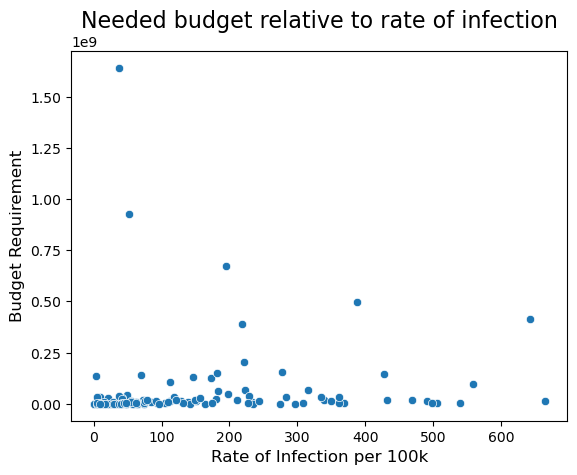

In [165]:
budget_and_burden = new_burden_2023.merge(new_budget_2023[['country', 'iso3', 'region', 'year', 'Number of patients expected to start treatment', 'budget required for treatment ($)', 'expected total budget']], on='country', how='left')
budget_and_burden
# sns.histplot(budget_and_burden['Est. Infected per 100k'], budget_and_burden['budget required for treatment ($)'],color='blue', edgecolor='black')
sns.scatterplot(data = budget_and_burden, x = 'Est. Infected per 100k', y = 'budget required for treatment ($)')
plt.title('Needed budget relative to rate of infection', fontsize=16)
plt.xlabel('Rate of Infection per 100k', fontsize=12)
plt.ylabel('Budget Requirement', fontsize=12)
plt.show()




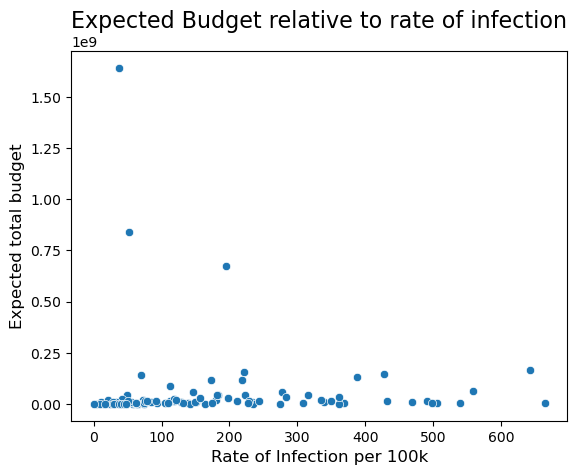

In [168]:
sns.scatterplot(data = budget_and_burden, x = 'Est. Infected per 100k', y = 'expected total budget')
plt.title('Expected Budget relative to rate of infection', fontsize=16)
plt.xlabel('Rate of Infection per 100k', fontsize=12)
plt.ylabel('Expected total budget', fontsize=12)
plt.show()


In [170]:
#While there's a lot of other aspects of the data that can be focused on, these two graphs here are really the main pattern that I want to emphasize. The disparity between the money used for treatment and the money needed for treatment is, for lack of a better word, insane.
#Especially given that the population with the highest rates of infection receive barely anymore resources compared to populations with low rates of infection.

/var/folders/tr/yklktj3j6814kkfy9tsqmbl80000gn/T/ipykernel_89262/1511157281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_burden_2023['log population'] = np.log10(new_burden_2023['population'])


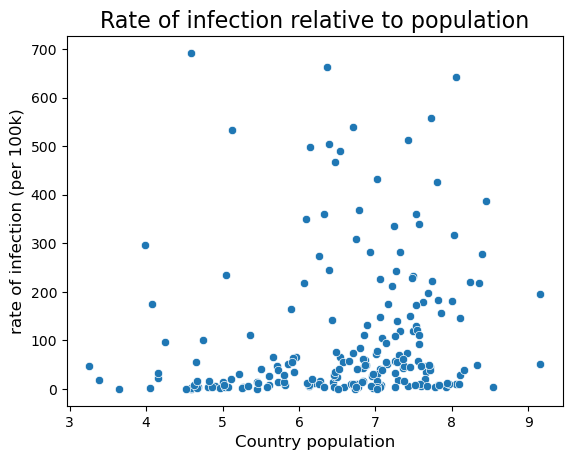

In [173]:
new_burden_2023['log population'] = np.log10(new_burden_2023['population'])
new_burden_2023
sns.scatterplot(data = new_burden_2023, x = 'log population', y = 'Est. Infected per 100k')
plt.title('Rate of infection relative to population', fontsize=16)
plt.xlabel('Country population', fontsize=12)
plt.ylabel('rate of infection (per 100k)', fontsize=12)
plt.show()

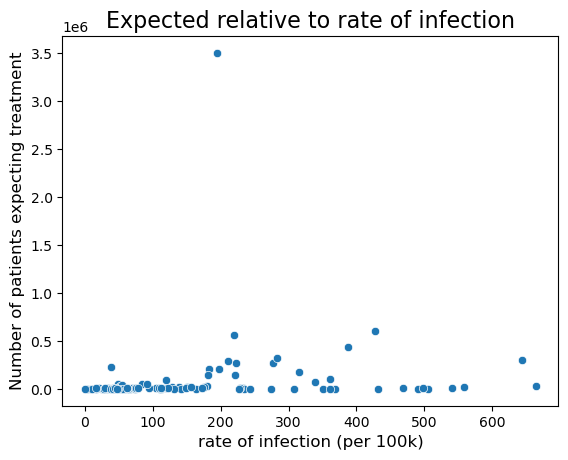

In [175]:
budget_and_burden
sns.scatterplot(data = budget_and_burden, x = 'Est. Infected per 100k', y = 'Number of patients expected to start treatment')
plt.title('Expected relative to rate of infection', fontsize=16)
plt.xlabel('rate of infection (per 100k)', fontsize=12)
plt.ylabel('Number of patients expecting treatment', fontsize=12)
plt.show()

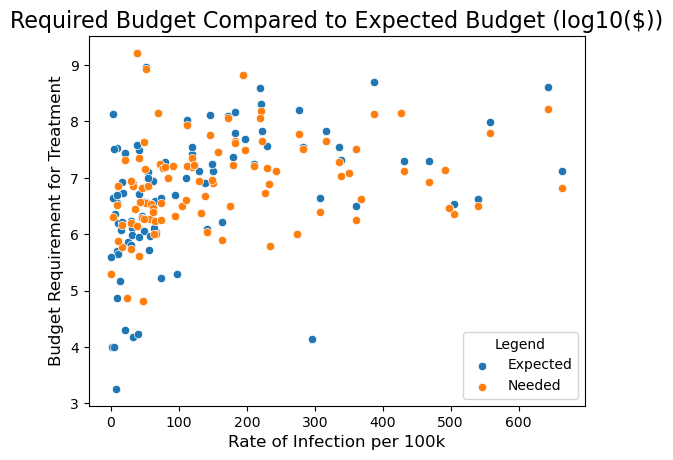

In [177]:
budget_and_burden = new_burden_2023.merge(new_budget_2023[['country', 'iso3', 'region', 'year', 'Number of patients expected to start treatment', 'budget required for treatment ($)', 'expected total budget']], on='country', how='left')
budget_and_burden['log expected'] = np.log10(budget_and_burden['expected total budget'])
budget_and_burden['log required'] = np.log10(budget_and_burden['budget required for treatment ($)'])

# sns.histplot(budget_and_burden['Est. Infected per 100k'], budget_and_burden['budget required for treatment ($)'],color='blue', edgecolor='black')
sns.scatterplot(data = budget_and_burden, x = 'Est. Infected per 100k', y = 'log required')
sns.scatterplot(data = budget_and_burden, x = 'Est. Infected per 100k', y = 'log expected')
plt.title('Required Budget Compared to Expected Budget (log10($))', fontsize=16)
plt.xlabel('Rate of Infection per 100k', fontsize=12)
plt.legend(title='Legend', labels=['Expected', 'Needed'])
plt.ylabel('Budget Requirement for Treatment', fontsize=12)
plt.show()

## Inference:

Hypothesis: There is no correlation between the rate of infection and the difference of needed and expected funding for TB treatment.

Null-Hypothesis: The difference between needed and expected funding will increase as rate of infection increases.

Generally, it would make sense for the rates of infection to be worse in more impoverished countries. So it then follows that one would expect these groups to be the ones receiving less treatment.



In [181]:
#cleaned table
budget_and_burden_new = budget_and_burden[['country', 'population', 'log population','Est. Infected per 100k', 'Est. Total Infected', 
                                          'budget required for treatment ($)', 'expected total budget', 'log expected', 'log required', 'death']]
budget_and_burden_new

# Adding new column that displays the proportion missing from the needed budget
budget_and_burden_new['budget gap'] = ((budget_and_burden_new['budget required for treatment ($)'])-(budget_and_burden_new['expected total budget'])) / (budget_and_burden_new['budget required for treatment ($)'])

budget_and_burden_new = budget_and_burden_new.dropna()
budget_and_burden_new = budget_and_burden_new[budget_and_burden_new['budget gap'] >=0]
budget_and_burden_new 
# This new column is the percentage of the budget left unfunded. 
budget_and_burden_nonzero = budget_and_burden_new[budget_and_burden_new['budget gap'] != 0]
budget_and_burden_nonzero = budget_and_burden_new[budget_and_burden_new['budget gap'] > 0]
budget_and_burden_nonzero
# Data table with countries that are full covered

/var/folders/tr/yklktj3j6814kkfy9tsqmbl80000gn/T/ipykernel_89262/3111246636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_and_burden_new['budget gap'] = ((budget_and_burden_new['budget required for treatment ($)'])-(budget_and_burden_new['expected total budget'])) / (budget_and_burden_new['budget required for treatment ($)'])


,country,population,log population,Est. Infected per 100k,Est. Total Infected,budget required for treatment ($),expected total budget,log expected,log required,death,budget gap
0,Afghanistan,41454760,7.617574,180.0,75000,23551821.0,17048217.0,7.231679,7.372024,10000.0,0.276140
5,Angola,36749909,7.565256,339.0,125000,20382058.0,10746549.0,7.031269,7.309248,19000.0,0.472745
16,Bangladesh,171466988,8.234181,221.0,379000,204331958.0,155803414.0,8.192577,8.310336,44000.0,0.237499
21,Benin,14111025,7.149559,51.0,7100,3784862.0,3516202.0,6.546074,6.578050,1200.0,0.070983
23,Bhutan,786378,5.895631,164.0,1300,1654179.0,783912.0,5.894267,6.218583,220.0,0.526102
32,Burundi,13689449,7.136386,94.0,13000,4980201.0,2128627.0,6.328100,6.697247,2200.0,0.572582
34,Cambodia,17423885,7.241145,335.0,58000,35290000.0,18830000.0,7.274850,7.547652,3700.0,0.466421
35,Cameroon,28372684,7.452900,150.0,43000,13071182.0,7941148.0,6.899883,7.116315,6900.0,0.392469
38,Central African Republic,5152418,6.712011,540.0,28000,4127559.0,3185341.0,6.503156,6.615693,4700.0,0.228275
39,Chad,19319066,7.285986,139.0,27000,8087529.0,4805972.0,6.681781,6.907816,4700.0,0.405755


(This new table, unfortunately, is pretty flawed because over half of the entries don't have data for either the required or the expected budget. So the best that can be done is to work with the remaining 82 countries. )


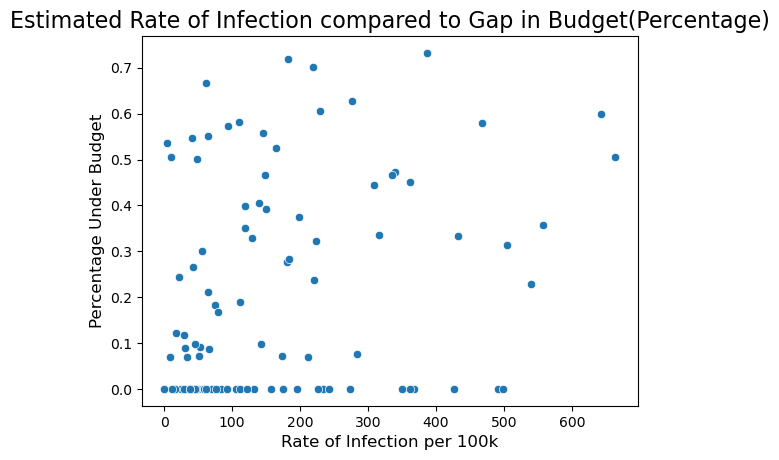

In [184]:
sns.scatterplot(data = budget_and_burden_new, x = 'Est. Infected per 100k', y = 'budget gap')
plt.title('Estimated Rate of Infection compared to Gap in Budget(Percentage)', fontsize=16)
plt.xlabel('Rate of Infection per 100k', fontsize=12)
plt.ylabel('Percentage Under Budget', fontsize=12)
plt.show()

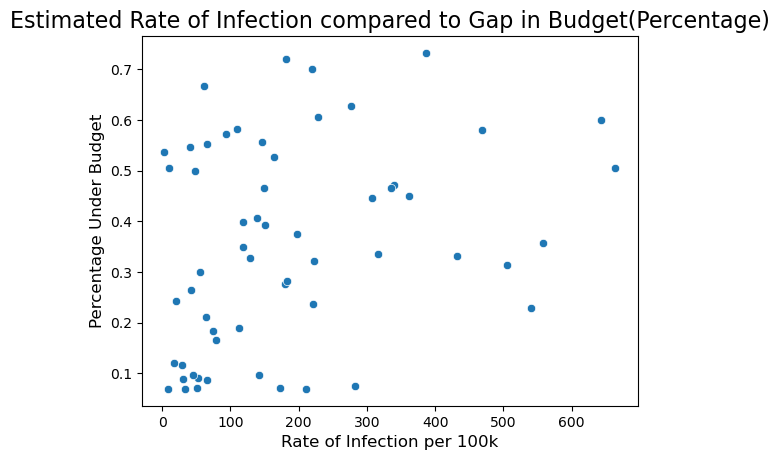

In [186]:
#without zero value entires
sns.scatterplot(data = budget_and_burden_nonzero, x = 'Est. Infected per 100k', y = 'budget gap')
plt.title('Estimated Rate of Infection compared to Gap in Budget(Percentage)', fontsize=16)
plt.xlabel('Rate of Infection per 100k', fontsize=12)
plt.ylabel('Percentage Under Budget', fontsize=12)
plt.show()

Given that I'm just checking for a simple correlation, I went with a linear regression model. 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


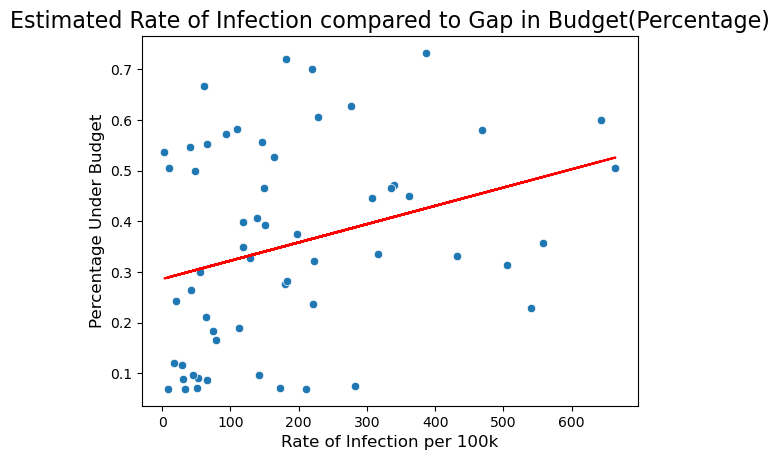

In [189]:
model = LinearRegression()

model.fit(X = budget_and_burden_nonzero[['Est. Infected per 100k']], y= budget_and_burden_nonzero['budget gap'])
model.predict([[20]])

regression = model.predict(budget_and_burden_nonzero[['Est. Infected per 100k']])

plt.plot(budget_and_burden_nonzero['Est. Infected per 100k'], regression, color = 'r')
sns.scatterplot(data = budget_and_burden_nonzero, x = 'Est. Infected per 100k', y = 'budget gap')
plt.title('Estimated Rate of Infection compared to Gap in Budget(Percentage)', fontsize=16)
plt.xlabel('Rate of Infection per 100k', fontsize=12)
plt.ylabel('Percentage Under Budget', fontsize=12)
plt.show()

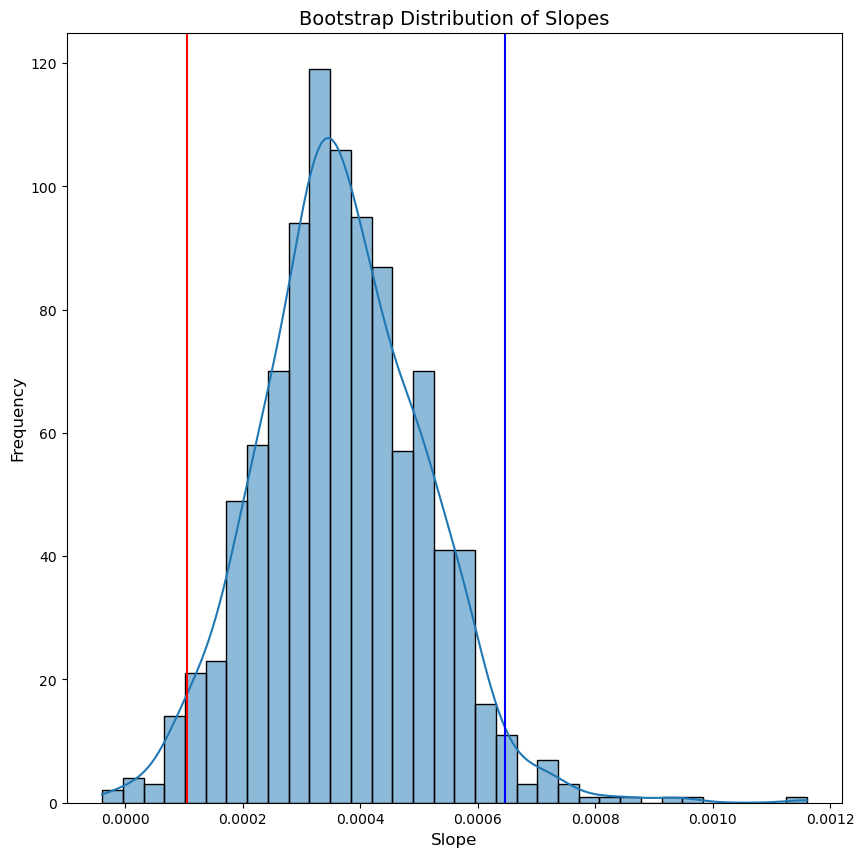

In [191]:

n_bootstraps = 1000
slopes = []




for i in range(n_bootstraps):
    bootstrap_sample = budget_and_burden_nonzero.sample(frac=1, replace=True)
    x_bootstrap = bootstrap_sample['Est. Infected per 100k']
    y_bootstrap = bootstrap_sample['budget gap']
    
    
    slope, _, _, _, _ = linregress(x_bootstrap, y_bootstrap)
    slopes.append(slope)

lower_bound = np.percentile(slopes, 2.5)
upper_bound = np.percentile(slopes, 97.5)

plt.figure(figsize=(10, 10))
sns.histplot(slopes, kde=True)
plt.axvline(lower_bound, color='red')
plt.axvline(upper_bound, color='blue')
plt.title('Bootstrap Distribution of Slopes', fontsize=14)
plt.xlabel('Slope', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


### Confidence


When bootstrapping the results, a slope of 0 falls outside the bounds of the second standard deviation (95% of the data) which means we can reject the null hypothesis of budget not correlating with the rate of infection.
While this model does show a positive correlation, it's significantly weaker than I was expecting. 

Partially, it is because this model is limited by the scope of the data. Only about half of the entries have valid values to plug in and then only about half of those values are actually usable(ie. not zero). Even when accounting for the zero values, the slope of the model is virtually identical. Additionally, the incomplete portions of the data are more likely to be from poorer countries with less means of being surveyed. All of the data used is collected from only 2023 because many countries were missing large portions of data for certain years. Attempting to average these would massively skew the results depending on how much annual data was collected for each country.

A key assumption that also limits this model is the belief that poorer countries will automatically have a higher rate of infection. This is likely the case since less access to treatments would naturally lead to higher rates of infections. However, you could also argue that a factor such as population density would play a bigger role in the rate of infection. I didn't account for at all when setting up this model so it could significantly impact the results. 

An aspect of the model that I'm fairly confident in is the utility of the Y value. Measuring the budget difference as a percentage rather than a straight difference seems more accurate since it ensures the gap is proportional to the country. If I were to change my setup from the start, I would probably choose something different than the rate of infection for each country. Using something such as the rate of death by country might give a more accurate measurement of how severly affected certain countries are affected by TB.

## Prediction:

Starting with baseline prediction model

In [50]:
#new variable, death rate
budget_and_burden_new['death rate'] = budget_and_burden_new['death'] / budget_and_burden_new ['population']
budget_and_burden_new
budget_and_burden_nonzero['death rate'] = budget_and_burden_nonzero['death'] / budget_and_burden_nonzero['population']
budget_and_burden_nonzero

/var/folders/tr/yklktj3j6814kkfy9tsqmbl80000gn/T/ipykernel_86453/569181827.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_and_burden_nonzero['death rate'] = budget_and_burden_nonzero['death'] / budget_and_burden_nonzero['population']


,country,population,log population,Est. Infected per 100k,Est. Total Infected,budget required for treatment ($),expected total budget,log expected,log required,death,budget gap,death rate
0,Afghanistan,41454760,7.617574,180.0,75000,23551821.0,17048217.0,7.231679,7.372024,10000.0,0.276140,2.412268e-04
5,Angola,36749909,7.565256,339.0,125000,20382058.0,10746549.0,7.031269,7.309248,19000.0,0.472745,5.170081e-04
16,Bangladesh,171466988,8.234181,221.0,379000,204331958.0,155803414.0,8.192577,8.310336,44000.0,0.237499,2.566092e-04
21,Benin,14111025,7.149559,51.0,7100,3784862.0,3516202.0,6.546074,6.578050,1200.0,0.070983,8.503989e-05
23,Bhutan,786378,5.895631,164.0,1300,1654179.0,783912.0,5.894267,6.218583,220.0,0.526102,2.797637e-04
32,Burundi,13689449,7.136386,94.0,13000,4980201.0,2128627.0,6.328100,6.697247,2200.0,0.572582,1.607077e-04
34,Cambodia,17423885,7.241145,335.0,58000,35290000.0,18830000.0,7.274850,7.547652,3700.0,0.466421,2.123522e-04
35,Cameroon,28372684,7.452900,150.0,43000,13071182.0,7941148.0,6.899883,7.116315,6900.0,0.392469,2.431917e-04
38,Central African Republic,5152418,6.712011,540.0,28000,4127559.0,3185341.0,6.503156,6.615693,4700.0,0.228275,9.121931e-04
39,Chad,19319066,7.285986,139.0,27000,8087529.0,4805972.0,6.681781,6.907816,4700.0,0.405755,2.432830e-04


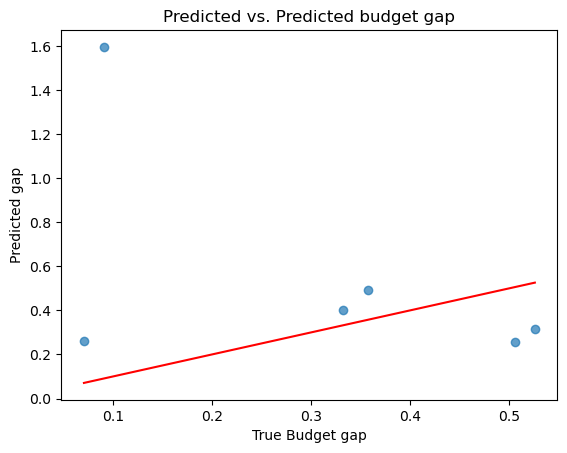

In [52]:

#test and train set
X = budget_and_burden_nonzero[['Est. Infected per 100k', 'death rate', 'population', 'expected total budget']]
Y = budget_and_burden_nonzero[['budget gap']]
X_train, X_Holdout, Y_train, Y_holdout = train_test_split(X, Y, test_size=.1)
import sklearn.linear_model as lm
linear_model = lm.LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_Holdout)
plt.scatter(Y_holdout, Y_pred, alpha=0.7)
plt.title("Predicted vs. Predicted budget gap")
plt.xlabel("True Budget gap")
plt.ylabel("Predicted gap")
plt.plot([Y_holdout.min(), Y_holdout.max()], [Y_holdout.min(), Y_holdout.max()], 'r')

plt.show()

In [54]:
#Loss Function:

def rmse(y, predicted_y):

    return np.sqrt(np.mean((y - predicted_y) ** 2))

y_pred = linear_model.predict(X_train)

train_error = rmse(Y_train, y_pred)
holdout_error = rmse(Y_holdout, Y_pred)

print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)

Training RMSE: 0.1746540508829392
Holdout RMSE: 0.6368617172826546


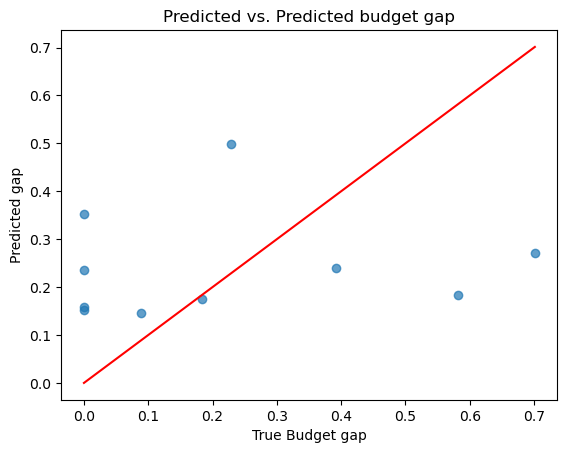

In [56]:
X = budget_and_burden_new[['Est. Infected per 100k', 'death rate', 'population', 'expected total budget']]
Y = budget_and_burden_new[['budget gap']]
X_train, X_Holdout, Y_train, Y_holdout = train_test_split(X, Y, test_size=.1)
import sklearn.linear_model as lm
linear_model = lm.LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_Holdout)
plt.scatter(Y_holdout, Y_pred, alpha=0.7)
plt.title("Predicted vs. Predicted budget gap")
plt.xlabel("True Budget gap")
plt.ylabel("Predicted gap")
plt.plot([Y_holdout.min(), Y_holdout.max()], [Y_holdout.min(), Y_holdout.max()], 'r')

plt.show()

In [58]:
#Loss Function:

def rmse(y, predicted_y):

    return np.sqrt(np.mean((y - predicted_y) ** 2))

y_pred = linear_model.predict(X_train)

train_error = rmse(Y_train, y_pred)
holdout_error = rmse(Y_holdout, Y_pred)

print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)

Training RMSE: 0.214254207309267
Holdout RMSE: 0.2592862862873427


The training error is slightly lower than the holdout error. This suggests that the model is likely overfitting the data. However, the general RMSE is low for both models which suggests a reasonable amount of accuracy in terms of prediction from the model. I originally thought the data was skewed by the 0 values but the RMSE actually decreased when using the nonzero data. I'm still unsure of why exactly the predictive model turned out this way but I think it could be the result of not having enough valid data points. 

While on paper, the model seems to be functional, I wouldn't be confident in its utility mainly due to the subject being studied. Compared to some other relationships, there's such a wide variety of variables that could affect any one of these outcomes that it seems oversimplistic to narrow it down to the handful I selected here. As mentioned earlier, I set my objective to simply establish that a correlation exists and I believe that was successful. 

## Citations:

#1. World Health Organization. (2024). Global tuberculosis report. World Health Organization. https://www.who.int/teams/global-tuberculosis-programme/data#csv_files 

#2. The World Bank. World Bank Country and Lending Groups. https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups


